In [1]:
# HSV_RESULT = [100, 180, 130, 255, 90, 255] # Blue
# HSV_RESULT = [115, 180, 130, 255, 0, 180] # black
# HSV_RESULT = [0, 45, 127, 255, 0, 255] # yellow

In [2]:
import cv2 as cv
import numpy as np
from find_object import FindObject

image = cv.imread('inputs/img_2.png')
image = cv.resize(image, (0, 0), fx=0.25, fy=0.25)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

light_blue = (100, 130, 90)
dark_blue = (180, 255, 255)
light_black = (115, 130, 0)
dark_black = (180, 255, 180)
light_yellow = (0, 127, 0)
dark_yellow = (45, 255, 255)
mask_blue = cv.inRange(hsv_image, light_blue, dark_blue)
mask_black = cv.inRange(hsv_image, light_black, dark_black)
mask_yellow = cv.inRange(hsv_image, light_yellow, dark_yellow)
mask = mask_blue + mask_yellow + mask_black
mask = np.clip(mask, 0, 255).astype(np.uint8)

In [3]:
model = FindObject(RGB_image=image, image_mask=mask)

In [4]:
import matplotlib.pyplot as plt
# %matplotlib qt

100%|██████████| 6600/6600 [00:02<00:00, 2678.78it/s]


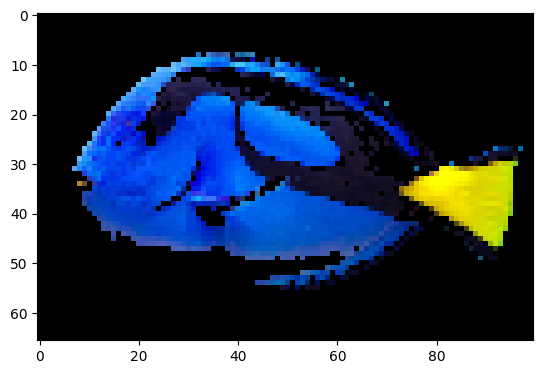

In [5]:
new_image = cv.imread('inputs/img_2.png')
new_image = cv.resize(new_image, (0, 0), fx=0.25, fy=0.25)
new_image = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)
output = model.remove_background(new_image)

plt.imshow(output)
plt.show()

100%|██████████| 10626/10626 [00:03<00:00, 2714.71it/s]


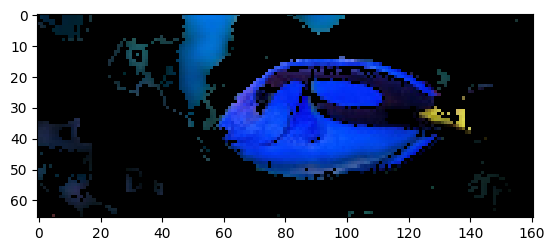

In [6]:
new_image = cv.imread('inputs/img_3.png')
new_image = cv.resize(new_image, (0, 0), fx=0.25, fy=0.25)
new_image = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)
output = model.remove_background(new_image)

plt.imshow(output)
plt.show()
